In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from fidap import fidap_client
import config
from config import api_key
from shapely import wkt

# instantiate api connection
fidap = fidap_client(api_key=api_key)

### Subway Stations in NYC  
  
Let us say that we are interested in the subway stations in NYC, and we want to find out where they are using the OpenStreetMap (OSM) dataset. 

In [58]:
## SQL query to get subway stations in NYC
subway_stations_proper = fidap.sql("""
SELECT geometry, short_name.value AS stn_name
FROM bigquery-public-data.geo_openstreetmap.planet_features_points
JOIN UNNEST(all_tags) AS short_name
WHERE short_name.key = 'short_name'
AND ('network', 'NYC Subway') IN (SELECT(key, value) FROM UNNEST(all_tags))
""")

In [15]:
subway_stations_proper.head(n = 5)

,geometry,stn_name
0,POINT(-73.9719996 40.7943793),96 St
1,POINT(-73.9473618 40.7038293),Lorimer St
2,POINT(-73.9533503 40.7068552),Hewes St
3,POINT(-73.9408924 40.8141229),135 St
4,POINT(-73.9362163 40.8204635),145 St
5,POINT(-73.9455416 40.8077529),125 St
6,POINT(-73.98311 40.677316),Union St
7,POINT(-73.968501 40.576312),Ocean Pkwy
8,POINT(-73.96007 40.688873),Classon Av
9,POINT(-73.988691 40.745494),28 St


In [24]:
subway_stations_proper.shape[0]

424

Great, we got all 424 of them. But the problem is that the `geometry` column is not exactly conducive for plotting. We have to convert the dataframe into a `GeoDataFrame` using the `GeoPandas` module. 

In [59]:
## converting into gdf
subway_stations_proper['geometry'] = subway_stations_proper['geometry'].apply(wkt.loads)
subway_stations_gdf = gpd.GeoDataFrame(subway_stations_proper, geometry = 'geometry', crs = 'epsg:4326')

With this conversion complete, we are able to plot the map of all subway stations in NYC. 

<AxesSubplot:>

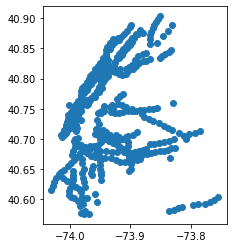

In [60]:
subway_stations_gdf.plot()

What if we want to draw a quarter mile radius around each subway station? 

In [65]:
subway_stations = subway_stations_gdf.copy()
subway_stations = subway_stations.to_crs('EPSG:3857')
subway_stations.geometry = subway_stations.geometry.buffer(400, 6)

(-8243074.348871691, -8208320.680530597, 4947177.7203211505, 5000910.190615622)

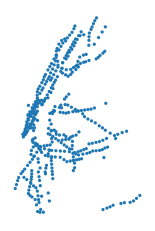

In [69]:
subway_stations.plot().axis('off')

Okay, what if we want to see a 1-mile buffer? 

In [71]:
subway_stations_1mi = subway_stations_gdf.copy()
subway_stations_1mi = subway_stations_1mi.to_crs('EPSG:3857')
subway_stations_1mi.geometry = subway_stations_1mi.geometry.buffer(1600, 6)

(-8244394.348871691, -8207000.680530597, 4945857.7203211505, 5002230.190615622)

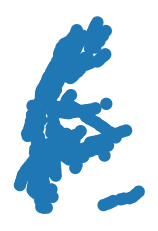

In [72]:
subway_stations_1mi.plot().axis('off')